In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exercice 1

Analyse statistique du dataset de fleurs Iris. Le jeu de données comprend 50 échantillons de chacune des trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor).  Quatre caractéristiques ont été mesurées pour chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres.

Si vous voulez changer de dataset, analysez des poissons au lieu de fleurs : "Fish"

### Importer le dataset

In [6]:
from sklearn import datasets 

iris = datasets.load_iris(as_frame=True) # true si vous voulez un dataframe pandas, false si vous voulez un np.array
X = iris.data  # données des 4 caractéristiques des fleurs
y = iris.target  # labels du type de fleur pour chaque instance

TODO : affichez taille du dataset et quelques exemples

In [15]:
X.shape

(150, 4)

In [16]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


 Créer un nouveau dataframe dans une variable X0, qui prend en compte seulement les individus appartenant à la classe y = 0 (Iris Setosa)

In [34]:
y[y==0].shape[0]

50

In [54]:
X0 = X.iloc[y[y==0].index.values]
X0.shape[0]

50

Calculer et afficher les valeurs des statistiques de base pour les variables 'Sepal length' et 'Sepal width' du dataset X0 :
* moyenne, mode, mediane
* deviation standard

In [55]:
X0[["sepal length (cm)", "sepal width (cm)"]].mean()

sepal length (cm)    5.006
sepal width (cm)     3.428
dtype: float64

In [56]:
X0[["sepal length (cm)", "sepal width (cm)"]].mode()

,sepal length (cm),sepal width (cm)
0,5.0,3.4
1,5.1,NaN


In [57]:
X0[["sepal length (cm)", "sepal width (cm)"]].median()

sepal length (cm)    5.0
sepal width (cm)     3.4
dtype: float64

In [45]:
X0[["sepal length (cm)", "sepal width (cm)"]].std()

sepal length (cm)    0.352490
sepal width (cm)     0.379064
dtype: float64

In [61]:
X0[["sepal length (cm)", "sepal width (cm)"]].describe()

,sepal length (cm),sepal width (cm)
count,50.00000,50.000000
mean,5.00600,3.428000
std,0.35249,0.379064
min,4.30000,2.300000
25%,4.80000,3.200000
50%,5.00000,3.400000
75%,5.20000,3.675000
max,5.80000,4.400000


Réfaire la même chose pour les individus de la classe y==1 (Iris Virginica), dans un datset X1.
Est-ce que vous remarquez des différences par rapport au type de Iris précédent? Pouvez vous tirer des conclusions?

In [66]:
X1 = X.iloc[y[y==1].index.values]
X1.shape[0]

50

In [67]:
X1[["sepal length (cm)", "sepal width (cm)"]].describe()

,sepal length (cm),sepal width (cm)
count,50.000000,50.000000
mean,5.936000,2.770000
std,0.516171,0.313798
min,4.900000,2.000000
25%,5.600000,2.525000
50%,5.900000,2.800000
75%,6.300000,3.000000
max,7.000000,3.400000


Pour les fleur Iris Setosa et Iris Virginica, faire aussi le calcul des quartiles pour la variable 'sepal length'. 
Ensuite, faire le plot de l'histogramme de cette variable et y rajouter des lignes verticales pour moyenne, mode, mediane et quartiles. Observez vous des différences ou des similarités?

In [72]:
print("X0 Q1",X0["sepal length (cm)"].quantile(0.25))
print("X0 Q3",X0["sepal length (cm)"].quantile(0.75))
print("X1 Q1",X1["sepal length (cm)"].quantile(0.25))
print("X1 Q3",X1["sepal length (cm)"].quantile(0.75))

X0 Q1 4.8
X0 Q3 5.2
X1 Q1 5.6
X1 Q3 6.3


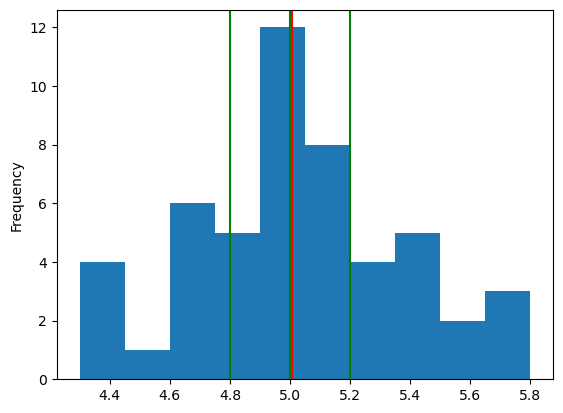

In [83]:
p0 = X0["sepal length (cm)"].plot.hist()
p0.axvline(X0["sepal length (cm)"].quantile(0.25), color="green")
p0.axvline(X0["sepal length (cm)"].quantile(0.5), color="green")
p0.axvline(X0["sepal length (cm)"].quantile(0.75), color="green")
p0.axvline(X0["sepal length (cm)"].mean(), color="red")

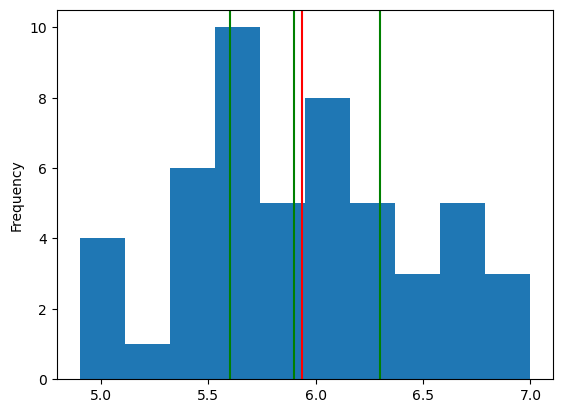

In [84]:
p1 = X1["sepal length (cm)"].plot.hist()
p1.axvline(X1["sepal length (cm)"].quantile(0.25), color="green")
p1.axvline(X1["sepal length (cm)"].quantile(0.5), color="green")
p1.axvline(X1["sepal length (cm)"].quantile(0.75), color="green")
p1.axvline(X1["sepal length (cm)"].mean(), color="red")

Pour les variables 'Sepal length' et 'Sepal width' du dataset X0, calculer le degré de corrélation linéaire, et "visualiser" cela à l'aide de leur scatterplot

In [93]:
X0[["sepal length (cm)", "sepal width (cm)"]].corr(method='pearson')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.000000,0.742547
sepal width (cm),0.742547,1.000000


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

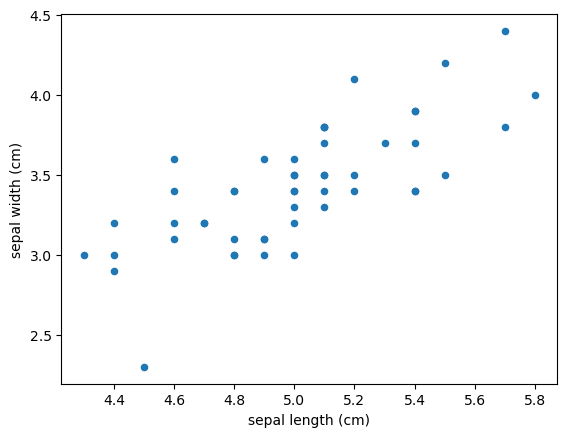

In [95]:
X0[["sepal length (cm)", "sepal width (cm)"]].plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)')

Dans le dataset complet X, visualisez si les trois classes de fleurs sont visuellement séparées sur un scatterplot dans les variables 'Sepal length' et 'Sepal width'. 
à noter que, le cas échéant, il serait assez simple de construire un modèle de classification d'Iris dans ces deux variables.

AxesSubplot(0.125,0.11;0.775x0.77) AxesSubplot(0.125,0.11;0.775x0.77) AxesSubplot(0.125,0.11;0.775x0.77)


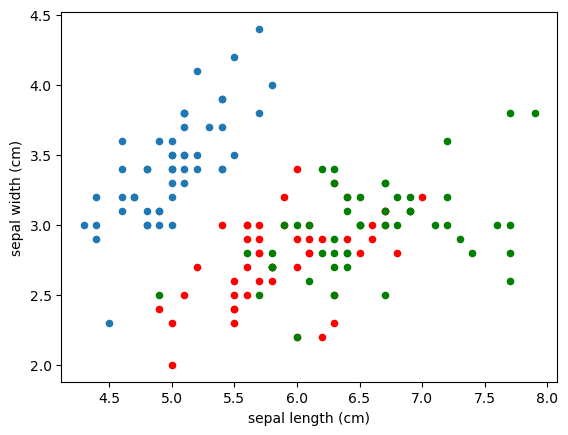

In [102]:
ps0 = X0[["sepal length (cm)", "sepal width (cm)"]].plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)')
ps1 = X1[["sepal length (cm)", "sepal width (cm)"]].plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)', color='r', ax=ps0)
X2 = X.iloc[y[y==2].index.values]
ps2 = X2[["sepal length (cm)", "sepal width (cm)"]].plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)', color='g', ax=ps0)

print(ps0, ps1, ps2)

Entrainer une PCA sur le dataset complet afin de réduire la dimensionnalité du dataset à deux composantes principales. Ensuite, visualiser si les trois classes sont séparées dans un scatterplot à niveau de ces nouvelles variables.

In [103]:
from sklearn.decomposition import PCA

In [106]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Xpca = X.loc[:, features].values
Xpca

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [128]:
ypca = y.values
ypca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Exercice 2

Dans cet exercice, nous allons analyser un mini dataset d'enquete d'affiliation politique. Suite à l'enquite, des données de tranche d'age (18-29 ans, 30-44, 45-65 et 65+) et d'affiliation politique (droite, gauche ou autre) ont été recoltées pour 1189 individus du pays "Politiville". Nous avons été demandé de vérifier s'il y a une liaison entre l'age et l'affiliation politique.

In [130]:
# dataset
data = [['18-29', 'Conservative'] for i in range(141)] + \
        [['18-29', 'Socialist'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Conservative'] for i in range(179)] + \
        [['30-44', 'Socialist'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Conservative'] for i in range(220)] + \
        [['45-65', 'Socialist'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Conservative'] for i in range(86)] + \
        [['65 & older', 'Socialist'] for i in range(101)] + \
        [['65 & older', 'Other'] for i in range(4)]

df = pd.DataFrame(data, columns = ['Age Group', 'Political Affiliation']) 
df.head()

,Age Group,Political Affiliation
0,18-29,Conservative
1,18-29,Conservative
2,18-29,Conservative
3,18-29,Conservative
4,18-29,Conservative


In [131]:
df.shape

(1189, 2)

Création du tableau de contingence (pd.crosstab dans pandas, avec margins=True)

In [134]:
contingence = pd.crosstab(df["Age Group"], df["Political Affiliation"], margins=True)
contingence

Political Affiliation,Conservative,Other,Socialist,All
Age Group,,,,
18-29,141,4,68,213
30-44,179,7,159,345
45-65,220,4,216,440
65 & older,86,4,101,191
All,626,19,544,1189


Calcul du chi-2 

In [139]:
from scipy.stats import chi2_contingency

In [140]:
c, p, dof, expected = chi2_contingency(contingence) 
print(p)


0.018121906378459784


Vérification de l'hypothèse. pour la valeur critique, on utilise le tableau de chi2 du package scipy.

In [ ]:
import scipy.stats as stats

# significance level and critical value
alpha = 0.05


### à completer ####

num_deg_liberte = ...

####################


critical_value = stats.chi2.ppf(...)

quelle est la conclusion qu'on peut tirer de ces données? est ce que le test est pertinent?